In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import config
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [87]:
def determine_english_level(text):
    if "pre-intermediate" in text:
        return "pre-intermediate"
    elif " intermediate" in text:
        return "intermediate"
    elif "upper-intermediate" in text:
        return "upper-intermediate"
    elif "advance" in text:
        return "advance"
    else:
        return np.nan

In [140]:
df = pd.read_csv("data.csv")
df["office"] = df["additional_info"].apply(lambda x: 1 if "office" in str(x).lower() else 0)
df["remote"] = df["additional_info"].apply(lambda x: 1 if "remote" in str(x).lower() or "віддалено" in str(x).lower() else 0)
df["english-level"] = df["additional_info"].apply(lambda x: determine_english_level(str(x).lower()))

In [90]:
df.head()

,company,position,link,location,experience,additional_info,date,views,reviews,description,office,remote,english-level
0,Starnavi,Middle Python Developer,https://djinni.co/jobs/550647-middle-python-de...,Україна,2,"Тільки віддалено, 2 роки досвіду, Upper-Interm...",16:33 09.01.2024,50,7,<b>REQUIRED SKILLS:</b><br>- 2+ years experien...,0,1,upper-intermediate
1,Cosmonova Broadcast,Junior Python Developer,https://djinni.co/jobs/414265-junior-python-de...,Україна,1,"Product, Гібридна робота, 1 рік досвіду, Pre-I...",15:22 09.01.2024,193,43,Cosmonova Broadcast - це IT і High Tech для ме...,0,0,pre-intermediate
2,Delphi Software,Automation QA Middle (Python) Engineer,https://djinni.co/jobs/573981-automation-qa-mi...,Україна,3,"Office або Remote, 3 роки досвіду, Upper-Inter...",14:43 09.01.2024,27,7,Perimeter 81 is expanding team for development...,1,1,upper-intermediate
3,Encomane,Senior Django Developer,https://djinni.co/jobs/620302-senior-django-de...,Україна,3,"Product, Тільки віддалено, 3 роки досвіду",14:14 09.01.2024,48,20,<b>Клієнт:</b><br>Консалтингова та аудиторська...,0,1,NaN
4,PLVision,QA Automation Engineer,https://djinni.co/jobs/611101-qa-automation-en...,Україна,3,"Office або Remote, 3 роки досвіду, Intermediate",13:16 09.01.2024,32,2,We invite a Quality Assurance (QA) Automation ...,1,1,intermediate


# Analysis of supply and demand

In [91]:
total = df.shape[0]
print(f"The total number of vacancies is {total}")
demand = (total / df["reviews"].sum()).round(2)
supply = (df["reviews"].sum() / df.shape[0]).round(2)
print(f"There are {demand} vacancies per review. {supply} reviews per vacancy.")
max_reviews = df["reviews"].max()
max_views = df["views"].max()
print(f"The maximum number of reviews per vacancy is {max_reviews}.\n"
      f"The maximum number of views per vacancy is {max_views}.")

The total number of vacancies is 198
There are 0.03 vacancies per review. 29.2 reviews per vacancy.
The maximum number of reviews per vacancy is 240.
The maximum number of views per vacancy is 867.


In [92]:
print("Review statistic:")
review = df["reviews"].describe()
print(review)
print("View statistic:")
view = df["reviews"].describe()
print(view)

Review statistic:
count    198.000000
mean      29.196970
std       48.335824
min        0.000000
25%        4.000000
50%       11.500000
75%       29.750000
max      240.000000
Name: reviews, dtype: float64
View statistic:
count    198.000000
mean      29.196970
std       48.335824
min        0.000000
25%        4.000000
50%       11.500000
75%       29.750000
max      240.000000
Name: reviews, dtype: float64


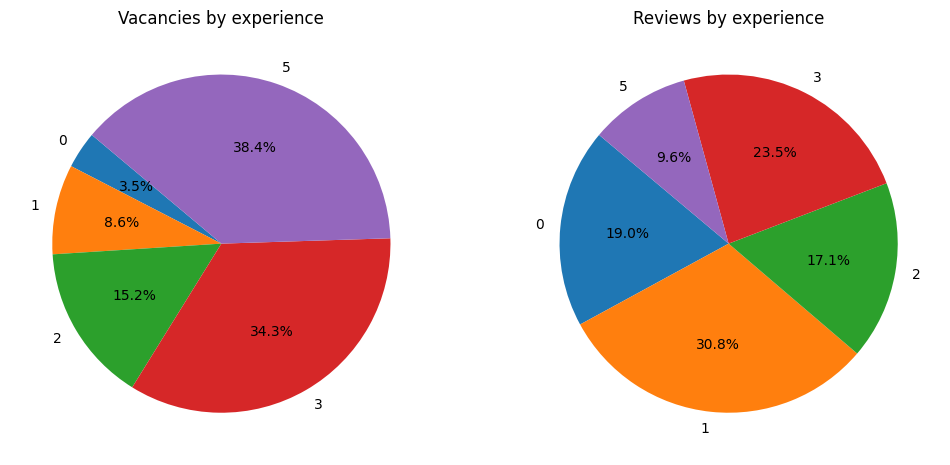

In [93]:
vacancies = df.groupby("experience")["position"].count()
reviews = df.groupby("experience")["reviews"].sum()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(vacancies, labels=vacancies.index, autopct='%1.1f%%', startangle=140)
plt.title("Vacancies by experience")

plt.subplot(1, 2, 2)
plt.pie(reviews, labels=reviews.index, autopct='%1.1f%%', startangle=140)
plt.title("Reviews by experience")

plt.show()

# Companies analysis

In [94]:
companies = df["company"].unique().shape[0]
print(f"{companies} - the numer of companies looking for python developers")
top5 = df.groupby("company")["position"].count().nlargest(5, "all")
top5

133 - the numer of companies looking for python developers


company
Luxoft         14
Dataforest      7
Adaptiq         6
GlobalLogic     5
Quintagroup     4
Trinetix        4
Name: position, dtype: int64

# Popular vacancies analysis

In [95]:
top10 = df[["position", "company", "reviews", "link"]].sort_values(by="reviews", ascending=False)[:10]
print(f"Top 10 vacancies by review")
top10

Top 10 vacancies by review


,position,company,reviews,link
70,Data Scrap Specialist (Python),Flai,240,https://djinni.co/jobs/618649-data-scrap-speci...
132,Python Developer,Lumitech,230,https://djinni.co/jobs/617286-python-developer/
21,Python Developer (Junior),Profisea,225,https://djinni.co/jobs/619869-python-developer...
39,Junior Python Developer,GT-Protocol,217,https://djinni.co/jobs/619289-junior-python-de...
46,Junior Python Developer,Forager.ai,213,https://djinni.co/jobs/619249-junior-python-de...
180,Python + Django,JetUp,192,https://djinni.co/jobs/615722-python-django/
44,Junior RPA developer,UAI Labs,185,https://djinni.co/jobs/619246-junior-rpa-devel...
36,Trainee Python/Django Developer,Netframe,185,https://djinni.co/jobs/545313-trainee-python-d...
109,Junior Backend Developer (Python + Django),Devsteam.cloud,165,https://djinni.co/jobs/617671-junior-backend-d...
142,Python Developer,Uni Agency,164,https://djinni.co/jobs/616889-python-developer/


In [96]:
top10 = df[["position", "company", "views", "link"]].sort_values(by="views", ascending=False)[:10]
print(f"Top 10 vacancies by view")
top10

Top 10 vacancies by view


,position,company,views,link
36,Trainee Python/Django Developer,Netframe,867,https://djinni.co/jobs/545313-trainee-python-d...
109,Junior Backend Developer (Python + Django),Devsteam.cloud,778,https://djinni.co/jobs/617671-junior-backend-d...
44,Junior RPA developer,UAI Labs,735,https://djinni.co/jobs/619246-junior-rpa-devel...
132,Python Developer,Lumitech,729,https://djinni.co/jobs/617286-python-developer/
70,Data Scrap Specialist (Python),Flai,714,https://djinni.co/jobs/618649-data-scrap-speci...
39,Junior Python Developer,GT-Protocol,709,https://djinni.co/jobs/619289-junior-python-de...
180,Python + Django,JetUp,626,https://djinni.co/jobs/615722-python-django/
46,Junior Python Developer,Forager.ai,616,https://djinni.co/jobs/619249-junior-python-de...
21,Python Developer (Junior),Profisea,602,https://djinni.co/jobs/619869-python-developer...
184,Junior Python Developer (full stack),Synergy Way,514,https://djinni.co/jobs/615243-junior-python-de...


# Location

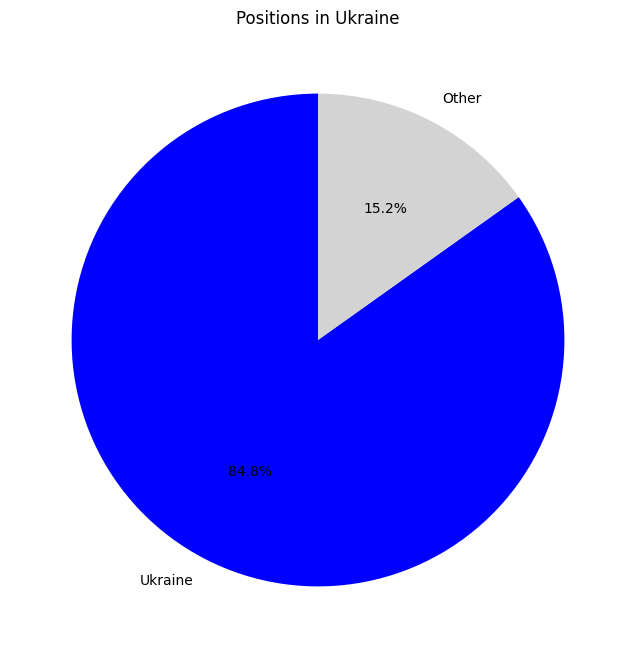

In [97]:
ua = df[df["location"].str.contains("Україна")].shape[0]
plt.figure(figsize=(8, 8))
plt.pie([ua, total - ua], labels=["Ukraine", "Other"],
        autopct='%1.1f%%', startangle=90, colors=["blue", "lightgray"])
plt.title("Positions in Ukraine")
plt.show()

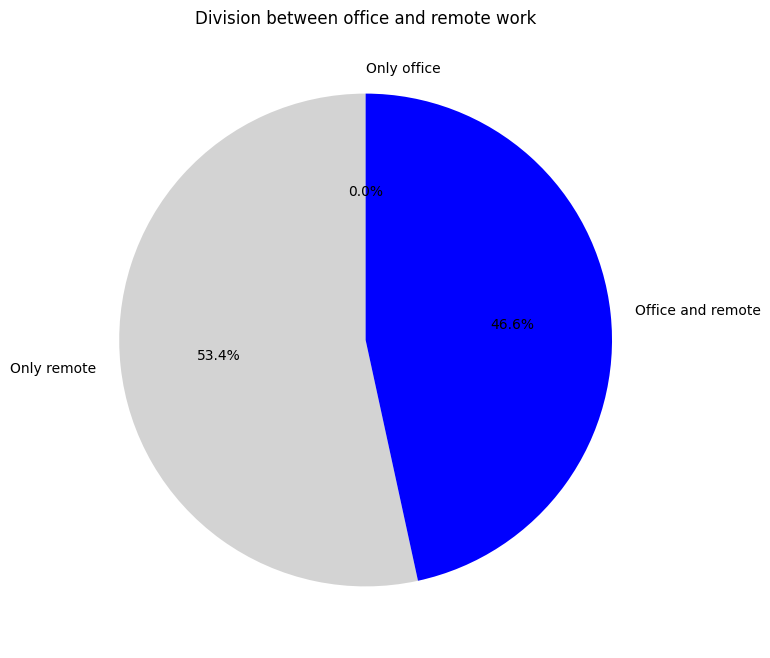

In [99]:
office = df[(df["office"] == 1) & (df["remote"] == 0)].shape[0]
remote = df[(df["office"] == 0) & (df["remote"] == 1)].shape[0]
office_remote = df[(df["office"] == 1) & (df["remote"] == 1)].shape[0]

plt.figure(figsize=(8, 8))
plt.pie([office, remote, office_remote], labels=["Only office", "Only remote", "Office and remote"], autopct="%1.1f%%", startangle=90, colors=["blue", "lightgray"])
plt.title("Division between office and remote work")
plt.show()

# English level

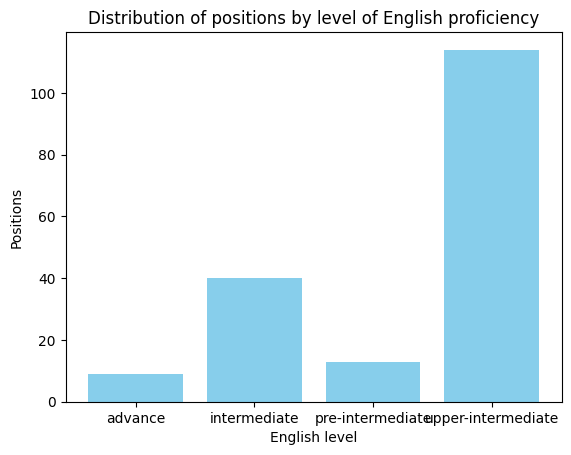

In [100]:
data = df[df["english-level"].notna()]
english = data.groupby("english-level")["position"].count()

plt.bar(english.index, english.values, color="skyblue")
plt.xlabel("English level")
plt.ylabel("Positions")
plt.title("Distribution of positions by level of English proficiency")
plt.show()

In [105]:
df["date"] = pd.to_datetime(df["date"], format="%H:%M %d.%m.%Y")
df["day"] = df["date"].dt.day_name()
days = df.groupby("day")["position"].count()
days

day
Friday       29
Monday       39
Saturday      4
Sunday        7
Thursday     45
Tuesday      38
Wednesday    36
Name: position, dtype: int64

In [192]:
nltk.download('stopwords')
nltk.download('punkt')
df['description'] = df['description'].apply(lambda x: ''.join([char.lower() if char.isalpha() or char.isspace() else ' ' for char in x]))
df['tokens'] = df['description'].apply(word_tokenize)
stop_words = set(stopwords.words('english')) | config.custom_stop_words
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df['word_count'] = df['filtered_tokens'].apply(lambda x: FreqDist(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


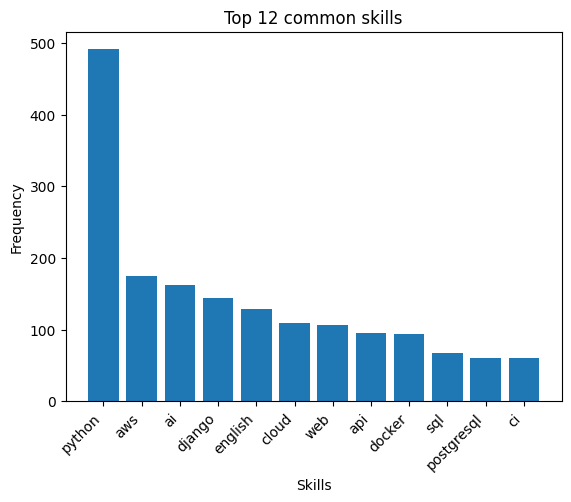

In [175]:
common_words = FreqDist([word for sublist in df['filtered_tokens'] for word in sublist])

top_words = common_words.most_common(12)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel('Frequency')
plt.title('Top 12 common skills')
plt.xticks(rotation=45, ha='right')
plt.show()

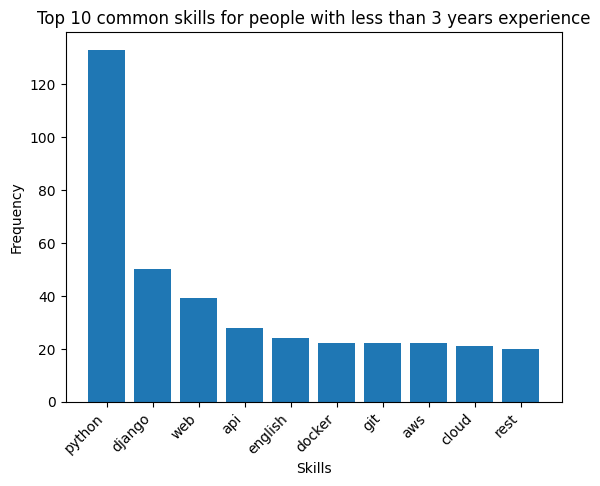

In [177]:
df_less_than_3_years_experience = df[df["experience"] < 3]
common_words = FreqDist([word for sublist in df_less_than_3_years_experience['filtered_tokens'] for word in sublist])

top_words = common_words.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel('Frequency')
plt.title('Top 10 common skills for people with less than 3 years experience')
plt.xticks(rotation=45, ha='right')
plt.show()

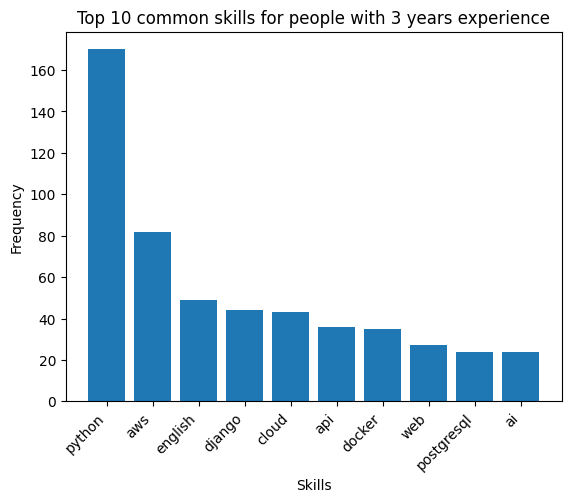

In [179]:
df_3_years_experience = df[df["experience"] == 3]
common_words = FreqDist([word for sublist in df_3_years_experience['filtered_tokens'] for word in sublist])

top_words = common_words.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel('Frequency')
plt.title('Top 10 common skills for people with 3 years experience')
plt.xticks(rotation=45, ha='right')
plt.show()

[('python', 188), ('ai', 119), ('aws', 71), ('english', 56), ('django', 50), ('vision', 46), ('cloud', 45), ('web', 40), ('docker', 37), ('senior', 35), ('client', 35), ('architecture', 35), ('practices', 34), ('sql', 34), ('expertise', 33)]


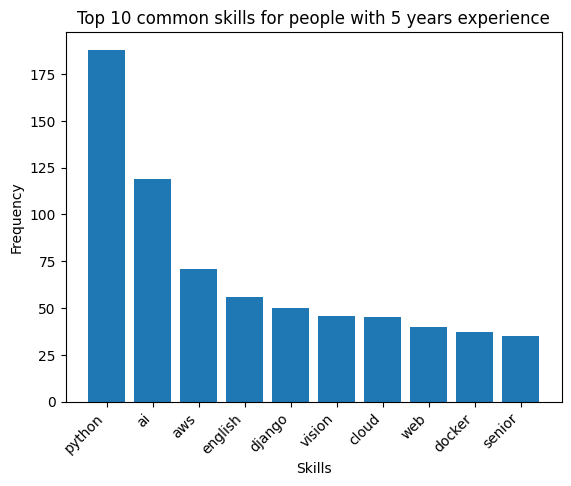

In [194]:
df_5_years_experience = df[df["experience"] == 5]
common_words = FreqDist([word for sublist in df_5_years_experience['filtered_tokens'] for word in sublist])
print(common_words.most_common(15))
top_words = common_words.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel('Frequency')
plt.title('Top 10 common skills for people with 5 years experience')
plt.xticks(rotation=45, ha='right')
plt.show()